# Key takeaways

<u>**Dataset properties**</u>:

- [No missing values](#missing-values-blank-check).
- Some numeric variables are not actually continous: 
    - [`yearc`](#yearc): represents the year of construction and only takes discrete year values.
    - [`rooms`](#rooms): indicates the number of rooms, which are integers ranging from 1 to 6.

<u>**Findings**</u>:

- [Most apartments are equipped with basic facilities, whereas high-end or upscale features are relatively uncommon.](#Categorical-variables)


    |Variable|Description|Yes rate (%)|
    |--|--|--|
    |cheating|Central heating available? |91.48|
    |wwater| Hot water supply available?| 96.49|
    |bathtile|Bathroom tiled?|81.49|
    |**bathextra**|High quality equipment in the bathroom?|**9.3**|
    |**upkitchen**|Upscale equipment in kitchen?|**7.31**|
    
- Top 10 districts by number of apartments:

    |Neuh-Nymp|177|
    |--|--|
    |Lud-Isar|161|
    |Au-Haid|139|
    |SchwWest|137|
    |Maxvor|132|
    |Laim|117|
    |Ram-Per |115|
    |Th-Ob-Fo-Fu-So|106|
    |Bogenh |98|
    |Ugies-Har |82|

- [Houses equipped with amenities tend to have a higher average `rent`](#rent-by-amenities), which is a reasonable trend in reality.

- [`location` clearly affects `rent`](#rent-by-location-and-district). Apartments in `good` and `top` locations tend to have higher average rents than those in `normal` areas, which aligns with real-world trends. However, [most apartments fall into the `normal` and `good` categories:](#rent-by-location-and-district)

    |`location`|count|
    |--|--|
    |normal|    1205|
    |good|       803|
    |top|         45|  

    and many of them still have very high rents (sometimes matching or exceeding those in the `top` group), suggesting that `location` is not the only factor influencing `rent`.
    
- [Finally, `area` and number of rooms (`rooms`) have a positive linear correlation with `rent`, meaning that `rent` tends to increase as these two variables increase. Meanwhile, the correlation between year of construction (`yearc`) and `rent` is quite weak](#corelation).

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
df = pd.read_csv("munichrent03.csv")
df.head(5)

Unnamed: 0    rent  rentsqm  area  rooms   yearc bathextra bathtile  \
0           1  741.39    10.90    68      2  1918.0        no      yes   
1           2  715.82    11.01    65      2  1995.0        no      yes   
2           3  528.25     8.38    63      3  1918.0        no      yes   
3           4  553.99     8.52    65      3  1983.0       yes      yes   
4           5  698.21     6.98   100      4  1995.0       yes      yes   

  cheating  district location upkitchen wwater  
0      yes  Lud-Isar     good        no    yes  
1      yes  Lud-Isar     good        no    yes  
2      yes  Lud-Isar     good        no    yes  
3      yes   Ram-Per   normal        no    yes  
4      yes   Ram-Per     good       yes    yes

In [3]:
print(tuple(df.iloc[:, 1:].columns))

('rent', 'rentsqm', 'area', 'rooms', 'yearc', 'bathextra', 'bathtile', 'cheating', 'district', 'location', 'upkitchen', 'wwater')


In [4]:
df.iloc[:, 1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       2053 non-null   float64
 1   rentsqm    2053 non-null   float64
 2   area       2053 non-null   int64  
 3   rooms      2053 non-null   int64  
 4   yearc      2053 non-null   float64
 5   bathextra  2053 non-null   object 
 6   bathtile   2053 non-null   object 
 7   cheating   2053 non-null   object 
 8   district   2053 non-null   object 
 9   location   2053 non-null   object 
 10  upkitchen  2053 non-null   object 
 11  wwater     2053 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 192.6+ KB


# Missing values, blank check

In [5]:
print("Missing value count for each column: ")
print(df.iloc[:,1:].isnull().sum(),"\n")
print("Blank value count for each column: ")
print((df.iloc[:, 1:] == " ").sum())

Missing value count for each column: 
rent         0
rentsqm      0
area         0
rooms        0
yearc        0
bathextra    0
bathtile     0
cheating     0
district     0
location     0
upkitchen    0
wwater       0
dtype: int64 

Blank value count for each column: 
rent         0
rentsqm      0
area         0
rooms        0
yearc        0
bathextra    0
bathtile     0
cheating     0
district     0
location     0
upkitchen    0
wwater       0
dtype: int64


# Descriptive Statistics

In [6]:
print("First 6 variables")
df.iloc[:, 1:6].describe(include="all")

First 6 variables


rent      rentsqm         area        rooms        yearc
count  2053.000000  2053.000000  2053.000000  2053.000000  2053.000000
mean    570.092981     8.393945    69.595226     2.597662  1957.983439
std     245.434507     2.466760    25.162558     0.982217    24.879186
min      77.310000     1.470000    17.000000     1.000000  1918.000000
25%     389.950000     6.800000    53.000000     2.000000  1948.000000
50%     534.300000     8.470000    67.000000     3.000000  1960.000000
75%     700.480000    10.090000    83.000000     3.000000  1973.000000
max    1789.550000    20.090000   185.000000     6.000000  2001.000000

In [7]:
print("6 remaining variables, all categorical")
df.iloc[:, 6:].describe(include="all")

6 remaining variables, all categorical


bathextra bathtile cheating   district location upkitchen wwater
count       2053     2053     2053       2053     2053      2053   2053
unique         2        2        2         25        3         2      2
top           no      yes      yes  Neuh-Nymp   normal        no    yes
freq        1862     1673     1878        177     1205      1903   1981

# Distributions

## Numerical variables 

### `rent`

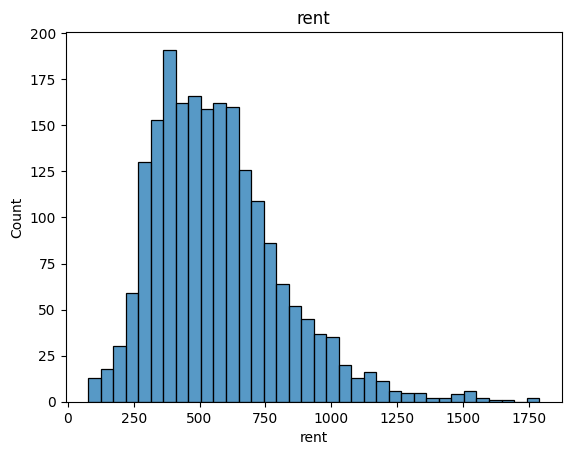

In [8]:
sns.histplot(df['rent'], kde=False)
plt.title("rent")
plt.show()

### `rentsqm`

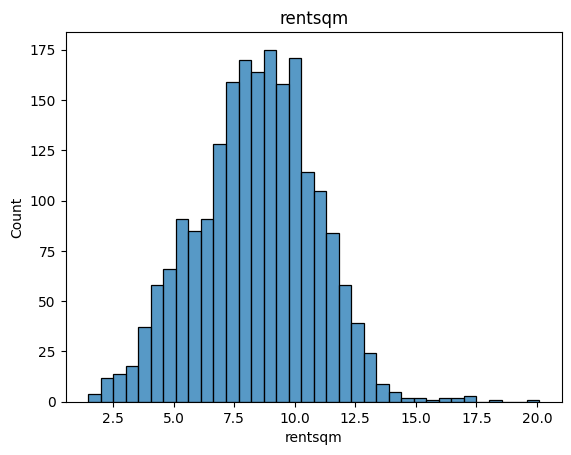

In [9]:
sns.histplot(df['rentsqm'], kde=False)
plt.title("rentsqm")
plt.show()


### `yearc`

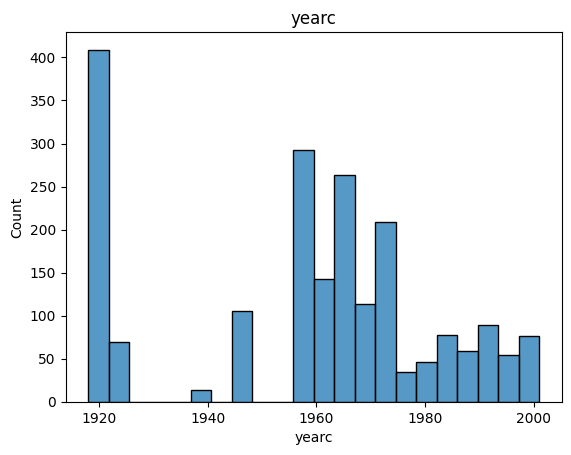

In [10]:
sns.histplot(df["yearc"])
plt.title("yearc")
plt.show()

In [11]:
print(df["yearc"].value_counts())

yearc
1918.0    409
1966.0    228
1957.0    225
1960.0    143
1948.0    105
1972.0     89
1924.0     69
1957.5     68
1973.0     55
1970.0     46
1969.0     44
1993.0     41
1983.0     40
1967.0     35
1971.0     35
1998.5     32
1974.0     30
1992.0     24
1968.0     23
1985.0     20
1996.0     20
1987.0     20
2000.0     18
1980.0     17
1984.0     17
1975.0     16
1989.0     15
1981.0     15
1998.0     14
1991.0     14
1939.0     14
1994.0     13
1988.0     13
1997.0     12
1986.0     11
1990.0     10
1995.0      9
1982.0      8
1999.0      7
1976.0      7
1977.0      6
1979.0      6
2001.0      5
1978.0      5
Name: count, dtype: int64


two unusual values in `yearc`: 1998.5 and 1957.5, while all others are full years. Let's correct this.

In [12]:
df["yearc"] = np.floor(df["yearc"])

To verify, divide each entry in the `yearc` column by itself. If the sum equals the total number of entries, the values are consistent.

In [13]:
print(sum(df["yearc"]/df["yearc"]))
print(len(df)) # all good now

2053.0
2053


### `rooms`

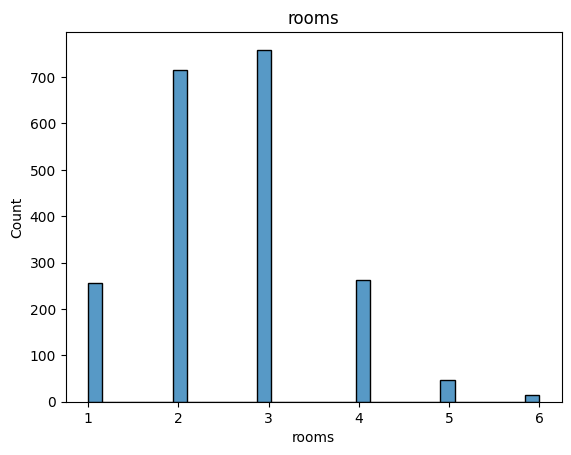

In [14]:
sns.histplot(df["rooms"])
plt.title("rooms")
plt.show()

In [15]:
print(df["rooms"].value_counts())
print(sum(tuple(df["rooms"].value_counts())))
print(len(df))

rooms
3    759
2    715
4    263
1    255
5     47
6     14
Name: count, dtype: int64
2053
2053


## Categorical variables

In [16]:
print(tuple(df.iloc[:,6:].columns))

('bathextra', 'bathtile', 'cheating', 'district', 'location', 'upkitchen', 'wwater')


In [17]:
for variable in df.iloc[:,6:9]:
    print(round(df[variable].value_counts(normalize=True)*100,2),"\n")

bathextra
no     90.7
yes     9.3
Name: proportion, dtype: float64 

bathtile
yes    81.49
no     18.51
Name: proportion, dtype: float64 

cheating
yes    91.48
no      8.52
Name: proportion, dtype: float64 



In [18]:
print((df["district"].value_counts(normalize=False)).head(10),"\n")
#print((df["district"]=="Neuh-Nymp").sum())

district
Neuh-Nymp         177
Lud-Isar          161
Au-Haid           139
SchwWest          137
Maxvor            132
Laim              117
Ram-Per           115
Th-Ob-Fo-Fu-So    106
Bogenh             98
Ugies-Har          82
Name: count, dtype: int64 



In [19]:
for variable in df.iloc[:,10:]:
    print(round(df[variable].value_counts(normalize=True)*100,2),"\n")

location
normal    58.69
good      39.11
top        2.19
Name: proportion, dtype: float64 

upkitchen
no     92.69
yes     7.31
Name: proportion, dtype: float64 

wwater
yes    96.49
no      3.51
Name: proportion, dtype: float64 



The relationship between `rentsqm`, `rent` and `area` is clear that 

$$\boxed{\text{rentsqm}=\frac{\text{rent}}{\text{area}}}$$

For instance, in row 1 and 100, we have that

In [20]:
df.iloc[[1,100],:]

Unnamed: 0    rent  rentsqm  area  rooms   yearc bathextra bathtile  \
1             2  715.82    11.01    65      2  1995.0        no      yes   
100         101  339.50     3.77    90      3  1973.0       yes      yes   

    cheating  district location upkitchen wwater  
1        yes  Lud-Isar     good        no    yes  
100      yes    Bogenh     good       yes    yes

In [21]:
# row 1: 
print(float(df["rent"].iloc[1])/float(df["area"].iloc[1]))
# row 100:
print(float(df["rent"].iloc[100])/float(df["area"].iloc[100]))
#Literally the rentsqm

11.012615384615385
3.772222222222222


Usually, we are more interested in the total `rent` of the entire house rather than the rent per square meter (`rentsqm`), as it better reflects the value of the property. On the other hand, `rentsqm` is easy to calculate using the above formula, so I decided to remove it from this dataset.

In [22]:
df = df.drop('rentsqm', axis=1)

In [23]:
df.head(3) #no more rentsqm

Unnamed: 0    rent  area  rooms   yearc bathextra bathtile cheating  \
0           1  741.39    68      2  1918.0        no      yes      yes   
1           2  715.82    65      2  1995.0        no      yes      yes   
2           3  528.25    63      3  1918.0        no      yes      yes   

   district location upkitchen wwater  
0  Lud-Isar     good        no    yes  
1  Lud-Isar     good        no    yes  
2  Lud-Isar     good        no    yes

# Corelation 

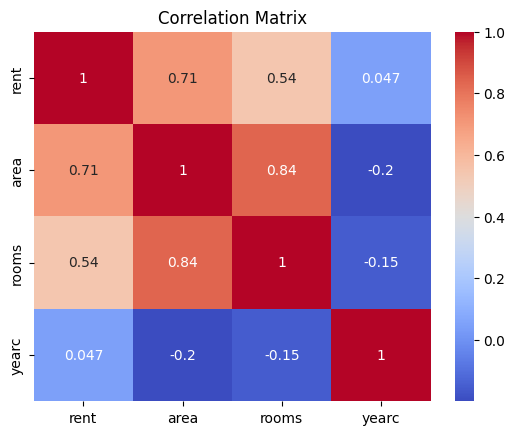

In [24]:
# correlation matrix for numerical variables
corr = df[['rent', 'area', 'rooms', 'yearc']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

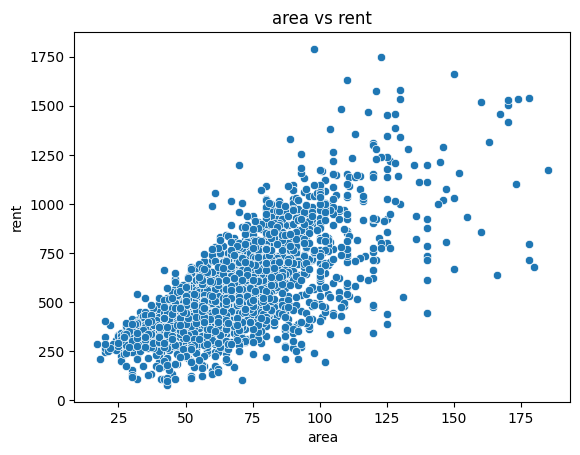

In [25]:
sns.scatterplot(x='area', y='rent', data=df)
plt.title("area vs rent")
plt.show()

# `rent` by categorical variables

In [26]:
print(tuple(df.iloc[:,5:].columns))

('bathextra', 'bathtile', 'cheating', 'district', 'location', 'upkitchen', 'wwater')


The red dots in the boxplots below represent the sample means.

## `rent` by `location` and `district`

Number of houses by location:
 location
normal    1205
good       803
top         45
Name: count, dtype: int64


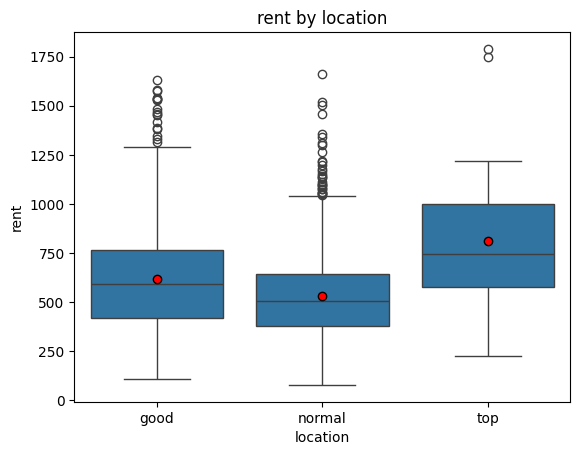

In [27]:
print("Number of houses by location:\n",df['location'].value_counts())
sns.boxplot(x='location', y='rent', data=df,
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            meanline=False)
plt.title("rent by location")
plt.show()

Top 5 Districts by Number of Apartments:
 district
Neuh-Nymp    177
Lud-Isar     161
Au-Haid      139
SchwWest     137
Maxvor       132
Laim         117
Ram-Per      115
Name: count, dtype: int64


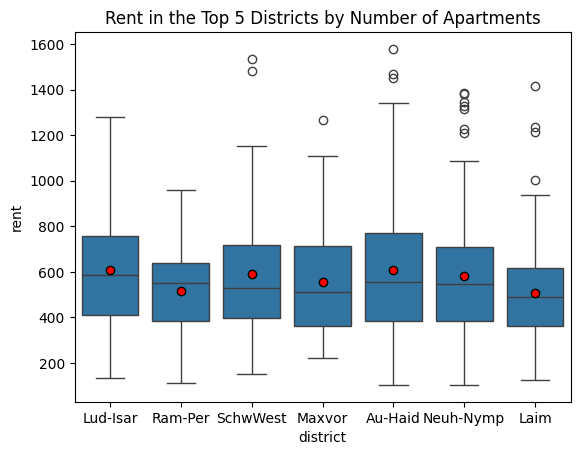

In [28]:
print("Top 5 Districts by Number of Apartments:\n",
      df['district'].value_counts().head(7))

top_districts = df['district'].value_counts().head(7).index
df_top = df[df['district'].isin(top_districts)]

sns.boxplot(x='district', y='rent', data=df_top,
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            meanline=False)

plt.title("Rent in the Top 5 Districts by Number of Apartments")
plt.show()

## `rent` by amenities
amenities: `bathtile`, `cheating`,`wwater`,`upkitchen`,and `bathextra`.

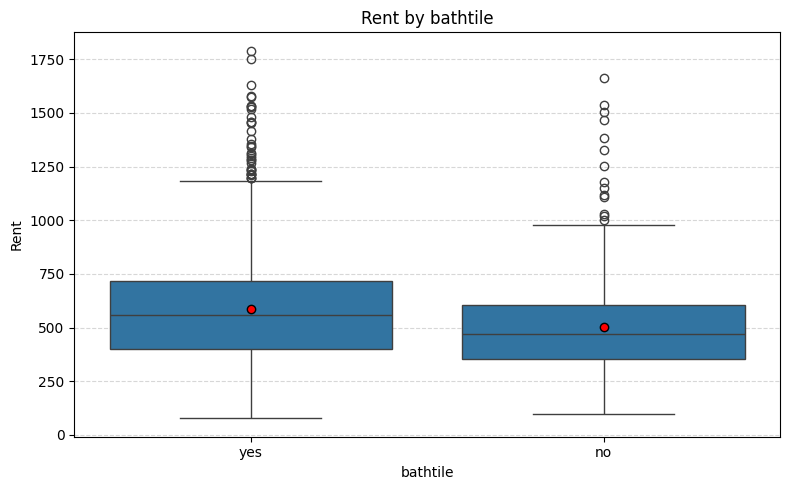

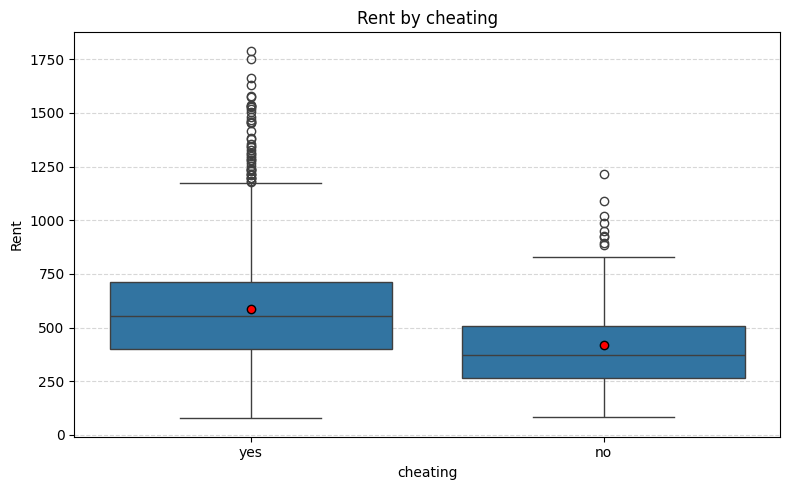

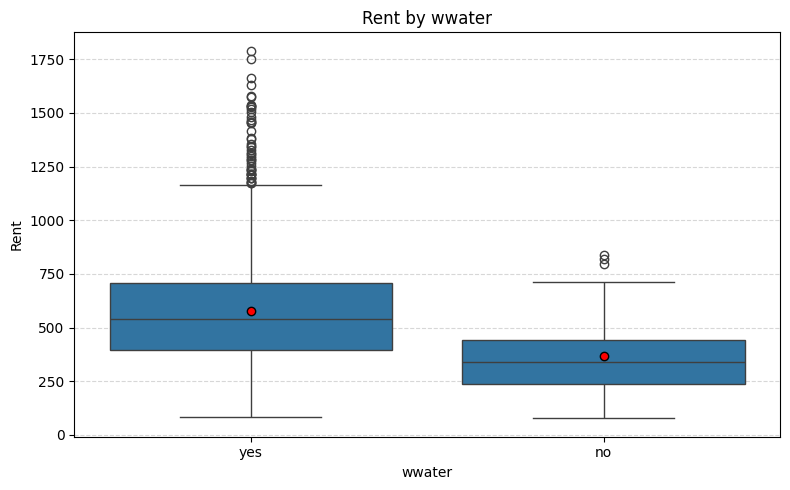

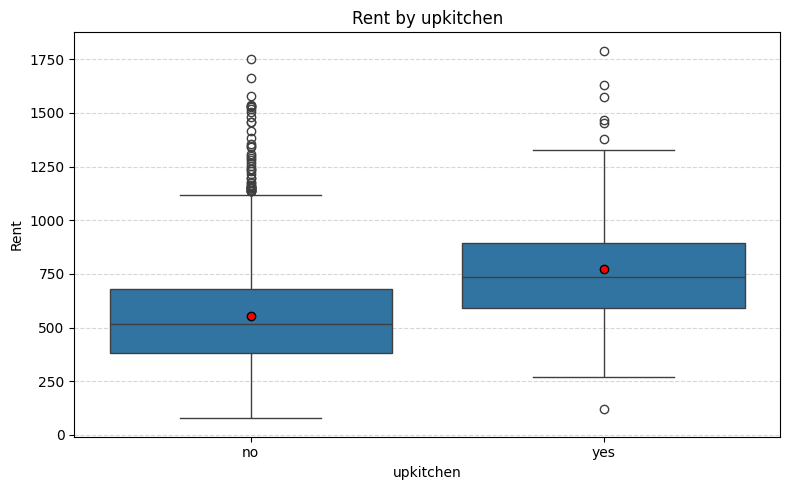

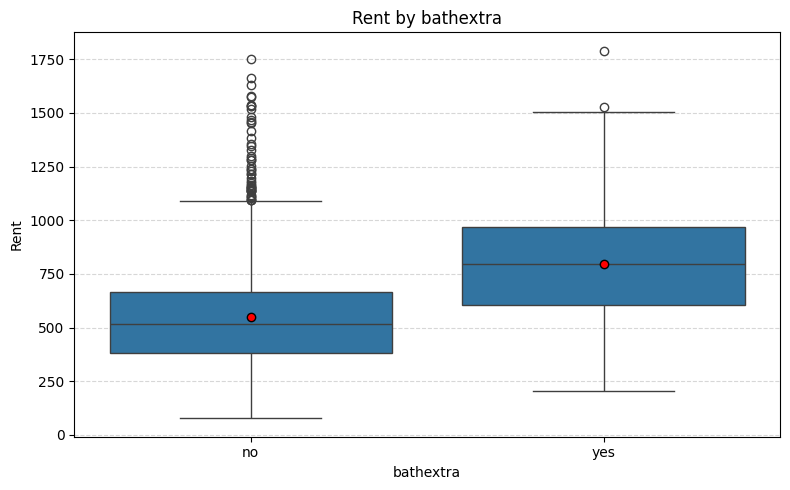

In [29]:
cat_var = ['bathtile', 'cheating','wwater','upkitchen','bathextra']

for variable in cat_var:
    plt.figure(figsize=(8, 5))
    
    # Boxplot
    sns.boxplot(x=variable, y='rent', data=df, showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
                meanline=False)

    plt.title(f"Rent by {variable}")
    plt.xlabel(variable)
    plt.ylabel("Rent")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()